In [2]:
%matplotlib inline


import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sb
from scipy import stats
from sklearn import cluster, datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics


import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [4]:
df = pd.read_csv("/Users/matteoppa/Desktop/Dataunderstandings.csv")
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
0,0,52.0,No,Travel_Rarely,Research & Development,9,4,Medical,2,Male,...,No,17,3.0,3,0,2.0,2,8.0,7,0
1,1,36.0,No,Travel_Rarely,Research & Development,1,1,Life Sciences,2,Male,...,Yes,14,3.0,3,1,3.0,3,1.0,8,0
2,2,60.0,No,Travel_Frequently,Sales,16,3,Life Sciences,3,Male,...,Yes,25,3.0,3,1,4.0,3,1.0,5,0
3,3,33.0,No,Travel_Rarely,Research & Development,5,4,Technical Degree,2,Male,...,No,14,3.0,2,0,1.0,3,3.0,7,0
4,4,31.0,No,Travel_Rarely,Research & Development,9,2,Life Sciences,3,Female,...,No,12,3.0,3,0,3.0,3,10.0,2,0


In [5]:
#Ho filtrato il dataset per business travel = traver rarely e attrition = yes
df_age = df[df['Age'] <40]

In [6]:

df_age.shape

(913, 27)

In [7]:
cleanup_bt = {'Male': 1, 'Female': 2,
              "Travel_Rarely": 1, "Travel_Frequently": 2, 'Non-Travel': 3, 
              'Research & Development': 1, 'Sales': 2, 'Human Recources':  3, 
              'Life Sciences': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5, 'Other': 6,
              'Sales Executive':1, 'Research Scientist':2, 'Laboratory Technician': 3, 'Manufacturing Director': 4, 
              'Heathcare Representative': 5, 'Manager': 6, 'Sales Representative': 7, 'Research Director': 8, 'Human Resources':9,
              'Married': 1, 'Single':2, 'Divorced': 3, 'No': 0, 'Yes': 1}
df_age.replace(cleanup_bt, inplace=True)

df_age.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,Unnamed: 0,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
1,1,36.0,0,1,1,1,1,1,2,1,...,1,14,3.0,3,1,3.0,3,1.0,8,0
3,3,33.0,0,1,1,5,4,4,2,1,...,0,14,3.0,2,0,1.0,3,3.0,7,0
4,4,31.0,0,1,1,9,2,1,3,2,...,0,12,3.0,3,0,3.0,3,10.0,2,0
5,5,35.0,0,1,1,7,3,1,4,1,...,0,11,3.0,4,3,2.0,3,1.0,2,0
6,6,27.0,0,1,2,4,2,1,3,1,...,0,11,3.0,1,1,0.0,3,9.0,3,0


In [8]:
df_age.dtypes

Unnamed: 0                    int64
Age                         float64
Attrition                     int64
BusinessTravel                int64
Department                    int64
DistanceFromHome              int64
Education                     int64
EducationField                int64
EnvironmentSatisfaction       int64
Gender                        int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                 int64
MonthlyIncome               float64
NumCompaniesWorked            int64
OverTime                      int64
PercentSalaryHike             int64
PerformanceRating           float64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear       float64
WorkLifeBalance               int64
YearsAtCompany              float64
YearsInCurrentRole            int64
Attrition_numerical           int64
dtype: object

In [9]:
#Creiamo un dataframe formato da soli valori continui


df_cont= df_age.drop(['Unnamed: 0', 'Attrition', 'Education','EnvironmentSatisfaction','JobInvolvement', 
                      'JobSatisfaction','RelationshipSatisfaction', 'Department', 'EducationField', 'Gender', 'JobRole',
                      'MaritalStatus', 'NumCompaniesWorked','TrainingTimesLastYear','StockOptionLevel','WorkLifeBalance', 
                      'JobLevel','PerformanceRating', 'Attrition', 'OverTime', 'BusinessTravel'], axis= 1)

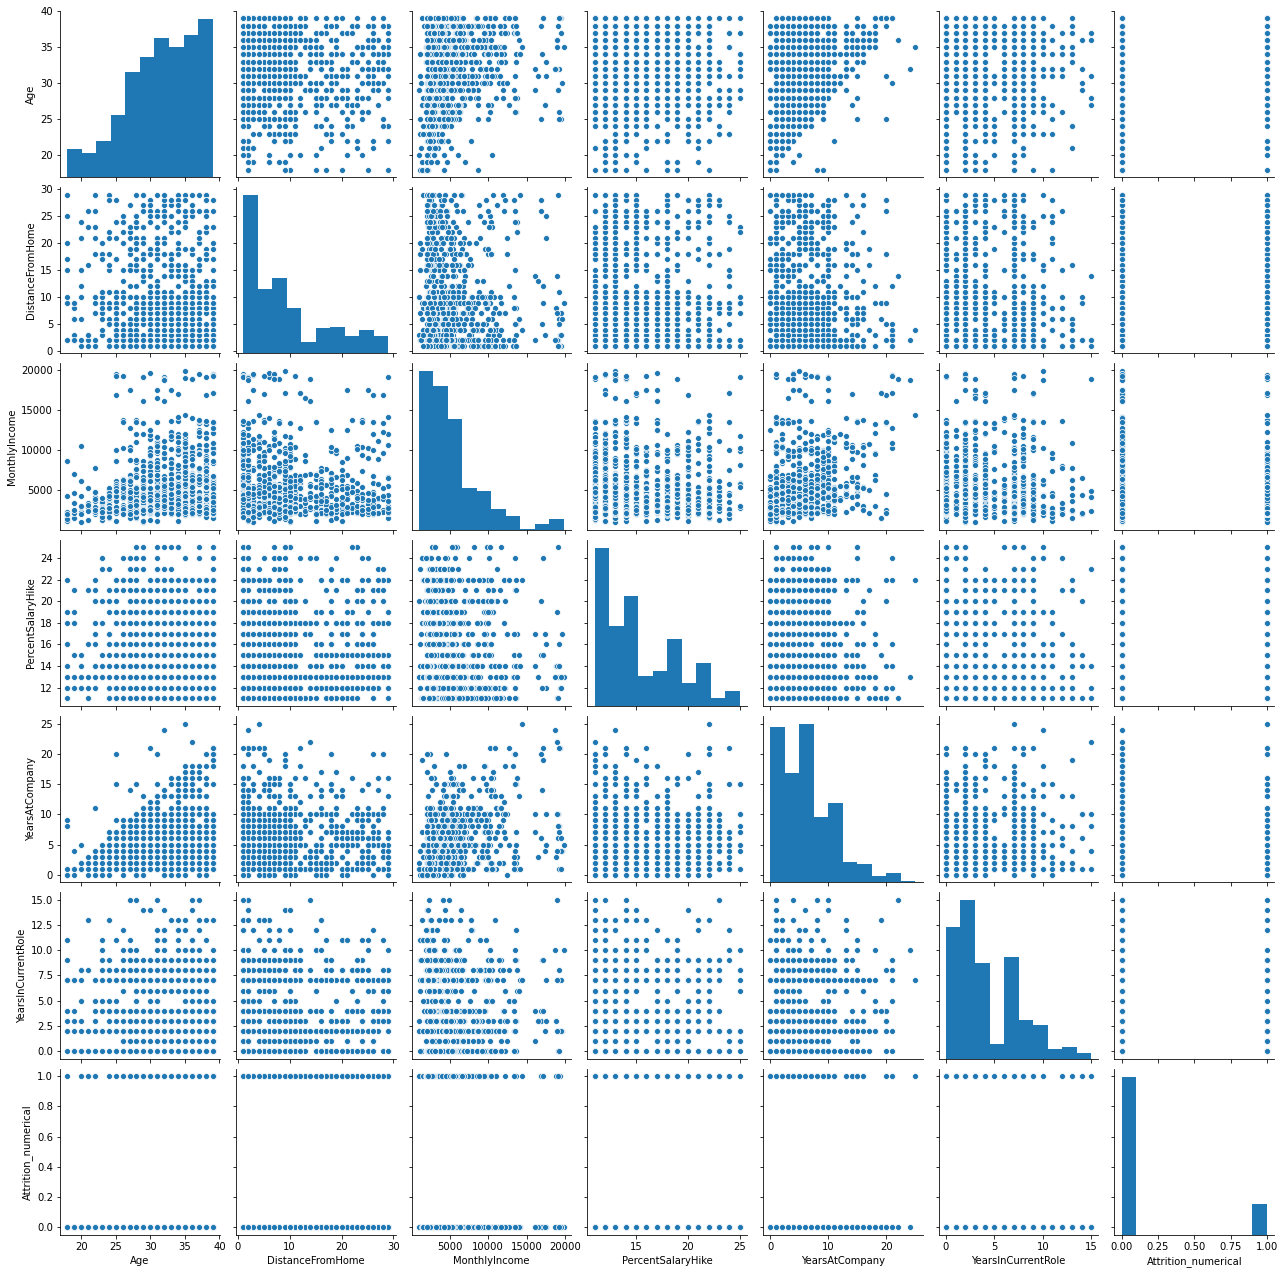

In [10]:
sb.pairplot(data= df_cont, kind='scatter')

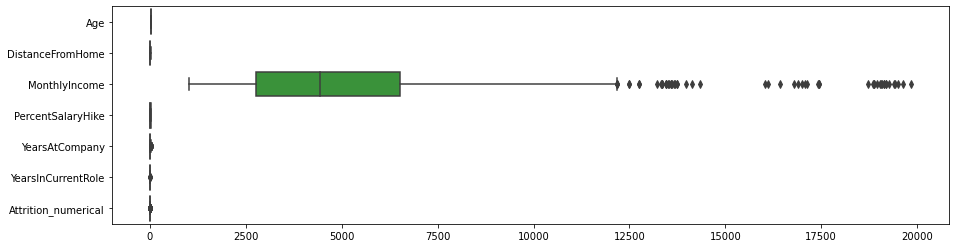

In [11]:
plt.figure(figsize = (15,4))
sb.boxplot(data = df_cont, orient = "h")
plt.show()

Analizzando il boxplot appena prodotto ci accorgiamo subito che la variabile MONTHLY RATE è decisamente ordini di grandezza superiore rispetto alle altre. 

# standardizzazione delle variabili

Istanziamo lo sklearn.StandardScaler() di sklearn per standardizzare il dataset: 

In [12]:
scaler = StandardScaler()

In [13]:
#Restituisce un np array con i valori standardizzati
scaled_array = scaler.fit_transform(df_cont)

In [14]:
#l'np array viene inserito all'interno di un dataframe per una migliore gestione 
scaled_df = pd.DataFrame( scaled_array, columns = df_cont.columns )

In [15]:
scaled_df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
0,0.927172,-1.008772,-0.163364,-0.343354,-1.115614,1.173048,-0.443387
1,0.316709,-0.505282,-0.717101,-0.343354,-0.670538,0.880746,-0.443387
2,-0.090265,-0.001792,0.692140,-0.890443,0.887226,-0.580761,-0.443387
3,0.723684,-0.253537,-0.861318,-1.163988,-1.115614,-0.580761,-0.443387
4,-0.904215,-0.631154,0.895676,-1.163988,0.664689,-0.288460,-0.443387


Una volta finita la standardizzazione mostriamo nuovamente il boxplot per verificare che tutto sia andato per il meglio

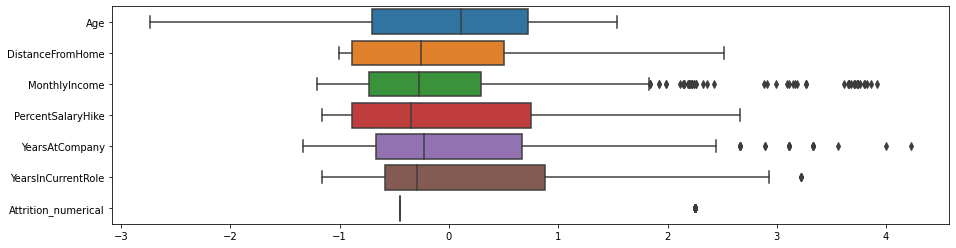

In [16]:
plt.figure(figsize = (15,4))
sb.boxplot(data = scaled_df, orient = "h")
plt.show()

In [17]:
scaled_df.describe()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,Attrition_numerical
count,9.130000e+02,9.130000e+02,9.130000e+02,9.130000e+02,9.130000e+02,9.130000e+02,9.130000e+02
mean,-3.407278e-16,-4.961347e-17,-8.870840e-17,-2.772518e-17,-1.277729e-16,2.906279e-17,-2.380960e-16
std,1.000548e+00,1.000548e+00,1.000548e+00,1.000548e+00,1.000548e+00,1.000548e+00,1.000548e+00
min,-2.735602e+00,-1.008772e+00,-1.204172e+00,-1.163988e+00,-1.338152e+00,-1.165364e+00,-4.433874e-01
25%,-7.007277e-01,-8.828993e-01,-7.288018e-01,-8.904430e-01,-6.705385e-01,-5.807611e-01,-4.433874e-01
50%,1.132219e-01,-2.535371e-01,-2.749277e-01,-3.433539e-01,-2.254628e-01,-2.884596e-01,-4.433874e-01
75%,7.236841e-01,5.016975e-01,2.964965e-01,7.508244e-01,6.646886e-01,8.807463e-01,-4.433874e-01
max,1.537634e+00,2.515656e+00,3.917966e+00,2.665636e+00,4.225294e+00,3.219158e+00,2.255364e+00


Tutte le variabili hanno media molto vicina allo 0 e deviazione standard vicina a 1. La standardizzazione ha funzionato e adesso risultano confrontabili.

# K-Means 

Bisogna decidere in numero di cluster che vogliamo ottenere, e per farlo è sufficiente disegnare la seguente curva

In [18]:
sse_list = list()
max_k = 50
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=20, max_iter=500)
    kmeans.fit(scaled_df)
    
    sse = kmeans.inertia_
    sse_list.append(sse)

In [19]:
sse_list

[5457.404116547613,
 4692.695431679388,
 4234.1293230704305,
 3843.3390937538306,
 3522.8653957472716,
 3297.030210822254,
 3142.067028212429,
 2997.609151565061,
 2870.4162004670557,
 2760.5011344650775,
 2662.030658582701,
 2566.604175034887,
 2482.1134321358854,
 2410.300808790864,
 2361.735116422951,
 2283.6119218244485,
 2221.5508662119983,
 2175.307910959259,
 2127.0764942551136,
 2074.70044355934,
 2027.44624602439,
 1982.0962311824187,
 1952.9973386831643,
 1910.3515102943425,
 1873.4341514007403,
 1847.9323661109133,
 1804.3751429802637,
 1798.3083225100947,
 1748.1261503989404,
 1702.8387641293834,
 1700.107631984421,
 1674.6874393905232,
 1636.6668269066522,
 1625.4146045941982,
 1597.1582123742705,
 1574.9584041235098,
 1562.7039100749196,
 1542.9227195838898,
 1517.0092455802155,
 1492.6078933449373,
 1482.9396064445077,
 1455.1138496658823,
 1450.7230735767155,
 1416.329996021679,
 1428.959827184642,
 1409.7499428414567,
 1401.461195597043,
 1381.5941725844698,
 1355.6547

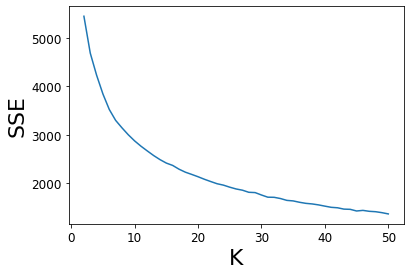

In [20]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

Visualizzazione Silhouette

In [21]:
k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    model_kmeans_k = KMeans( n_clusters = 10 )
    model_kmeans_k.fit(scaled_df.drop('k', axis = 1))
    labels_k = model_kmeans_k.labels_
    score_k = metrics.silhouette_score(scaled_df.drop("k", axis=1), labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))
    

print("Done!")

KeyError: "['k'] not found in axis"

In [22]:
silhouette_scores.values()

dict_values([])

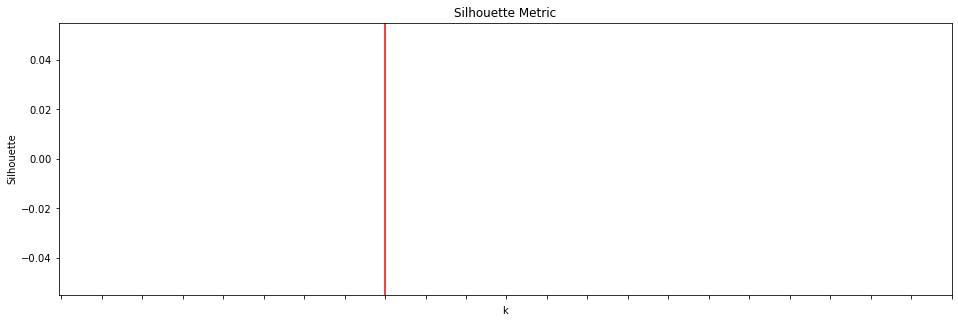

In [23]:
plt.figure(figsize = (16,5))
plt.plot(np.array(list(silhouette_scores.values())).astype(float))
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.axvline(8, color = "r")
plt.show()

Il miglior numero di cluster da scegliere è 10! 

In [24]:
kmeans_model = KMeans(n_clusters = 10, max_iter = 500, n_init=20)

In [25]:
kmeans_model.fit(scaled_df)

KMeans(max_iter=500, n_clusters=10, n_init=20)

Il modello è stato avviato e ha trovato i 3 centroidi che rappresentano i nostri 3 cluster. Proviamo a mostrarne le coordinate: 

In [26]:
centroids = kmeans_model.cluster_centers_
centroids

array([[-0.08370139, -0.29549461, -0.17228491, -0.47571415, -0.23024854,
        -0.12502223,  2.25536398],
       [ 0.37739855, -0.5030737 , -0.17230047, -0.63609455, -0.0640903 ,
        -0.64571698, -0.44338741],
       [ 0.82542784,  0.0086971 ,  1.31156365, -0.08348652,  2.33001359,
         0.22306797, -0.21849146],
       [ 0.05089243,  1.73547406, -0.25601994, -0.04763   , -0.25353061,
         0.15130927, -0.44338741],
       [ 0.12887479,  0.10794267,  2.82999201, -0.16099082, -0.17410789,
         0.01883168, -0.23579115],
       [-1.49617851, -0.24001365, -0.58782349, -0.31170408, -0.66869933,
        -0.20874103, -0.44338741],
       [ 0.75112064, -0.45012441,  0.22089978,  1.11657504,  0.26212016,
        -0.44938964, -0.44338741],
       [-0.63379108, -0.31647334, -0.34104605,  1.6146494 , -0.28109724,
         0.65767411, -0.44338741],
       [ 0.38260048, -0.3518375 , -0.32298692, -0.57782065, -0.11737296,
         1.35121247, -0.41768502],
       [ 0.10898259,  0.9632

Trovandoci in uno spazio R^7 , i nostri punti (centoridi) avranno 7 coordinate :

In [27]:
kmeans_model.cluster_centers_.shape

(10, 7)

Vediamo a quale cluster sono state assegnate le nostre osservazioni; e attacchiamo la colonna al dataset di partenza

In [28]:
kmeans_model.labels_

array([8, 8, 1, 1, 1, 6, 7, 5, 0, 3, 7, 8, 1, 8, 1, 1, 6, 1, 4, 3, 9, 2,
       2, 3, 8, 8, 8, 5, 1, 7, 6, 5, 3, 1, 7, 4, 0, 7, 5, 3, 1, 8, 8, 7,
       7, 6, 3, 3, 1, 9, 6, 6, 5, 1, 2, 6, 3, 8, 5, 1, 8, 5, 0, 6, 8, 1,
       3, 1, 0, 1, 0, 0, 1, 5, 1, 1, 4, 0, 0, 7, 3, 1, 7, 5, 2, 4, 0, 5,
       0, 6, 8, 3, 7, 8, 3, 3, 1, 4, 3, 6, 8, 6, 8, 2, 2, 7, 0, 1, 3, 1,
       2, 0, 5, 9, 3, 3, 7, 1, 7, 5, 7, 6, 4, 6, 0, 1, 5, 1, 1, 5, 2, 7,
       8, 5, 3, 8, 0, 5, 6, 0, 1, 5, 2, 0, 3, 0, 9, 5, 9, 9, 2, 5, 1, 4,
       5, 8, 3, 1, 6, 8, 6, 0, 1, 9, 1, 8, 6, 6, 3, 1, 8, 8, 9, 9, 1, 0,
       6, 3, 5, 9, 5, 5, 1, 8, 8, 8, 9, 3, 6, 1, 1, 9, 4, 1, 0, 2, 6, 9,
       4, 0, 8, 8, 5, 2, 1, 0, 5, 6, 0, 5, 5, 7, 8, 8, 7, 1, 9, 5, 1, 1,
       6, 0, 4, 9, 3, 4, 3, 0, 7, 5, 5, 0, 0, 0, 7, 8, 1, 9, 1, 1, 5, 5,
       8, 6, 3, 5, 3, 3, 5, 7, 1, 1, 8, 2, 1, 3, 9, 8, 3, 2, 4, 7, 7, 5,
       2, 5, 1, 2, 9, 7, 6, 1, 5, 6, 0, 9, 7, 5, 3, 1, 3, 8, 7, 6, 2, 1,
       9, 5, 3, 1, 3, 2, 0, 0, 8, 8, 1, 1, 9, 2, 3,

In [29]:
scaled_df["cluster"] = kmeans_model.labels_

In [30]:
scaled_df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,YearsAtCompany,YearsInCurrentRole,Attrition_numerical,cluster
0,0.927172,-1.008772,-0.163364,-0.343354,-1.115614,1.173048,-0.443387,8
1,0.316709,-0.505282,-0.717101,-0.343354,-0.670538,0.880746,-0.443387,8
2,-0.090265,-0.001792,0.692140,-0.890443,0.887226,-0.580761,-0.443387,1
3,0.723684,-0.253537,-0.861318,-1.163988,-1.115614,-0.580761,-0.443387,1
4,-0.904215,-0.631154,0.895676,-1.163988,0.664689,-0.288460,-0.443387,1


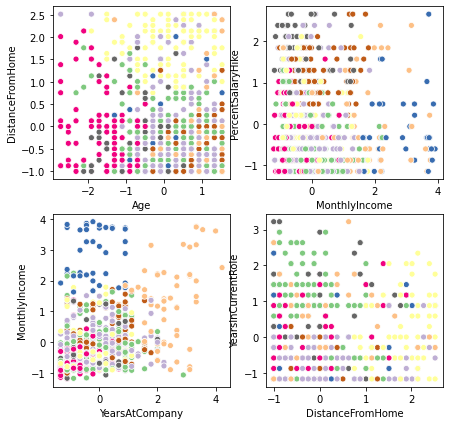

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (7,7))

sb.scatterplot(x = "Age", y = "DistanceFromHome", data = scaled_df, hue = "cluster", palette = "Accent", ax = ax1, legend=False)
sb.scatterplot(x = "MonthlyIncome", y = "PercentSalaryHike", data = scaled_df, hue = "cluster", palette = "Accent",ax = ax2, legend=False)
sb.scatterplot(x = "YearsAtCompany", y = "MonthlyIncome", data = scaled_df, hue = "cluster", palette = "Accent", ax = ax3, legend=False)
sb.scatterplot(x = "DistanceFromHome", y = "YearsInCurrentRole", data = scaled_df, hue = "cluster", palette = "Accent",ax = ax4, legend=False)

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Defa

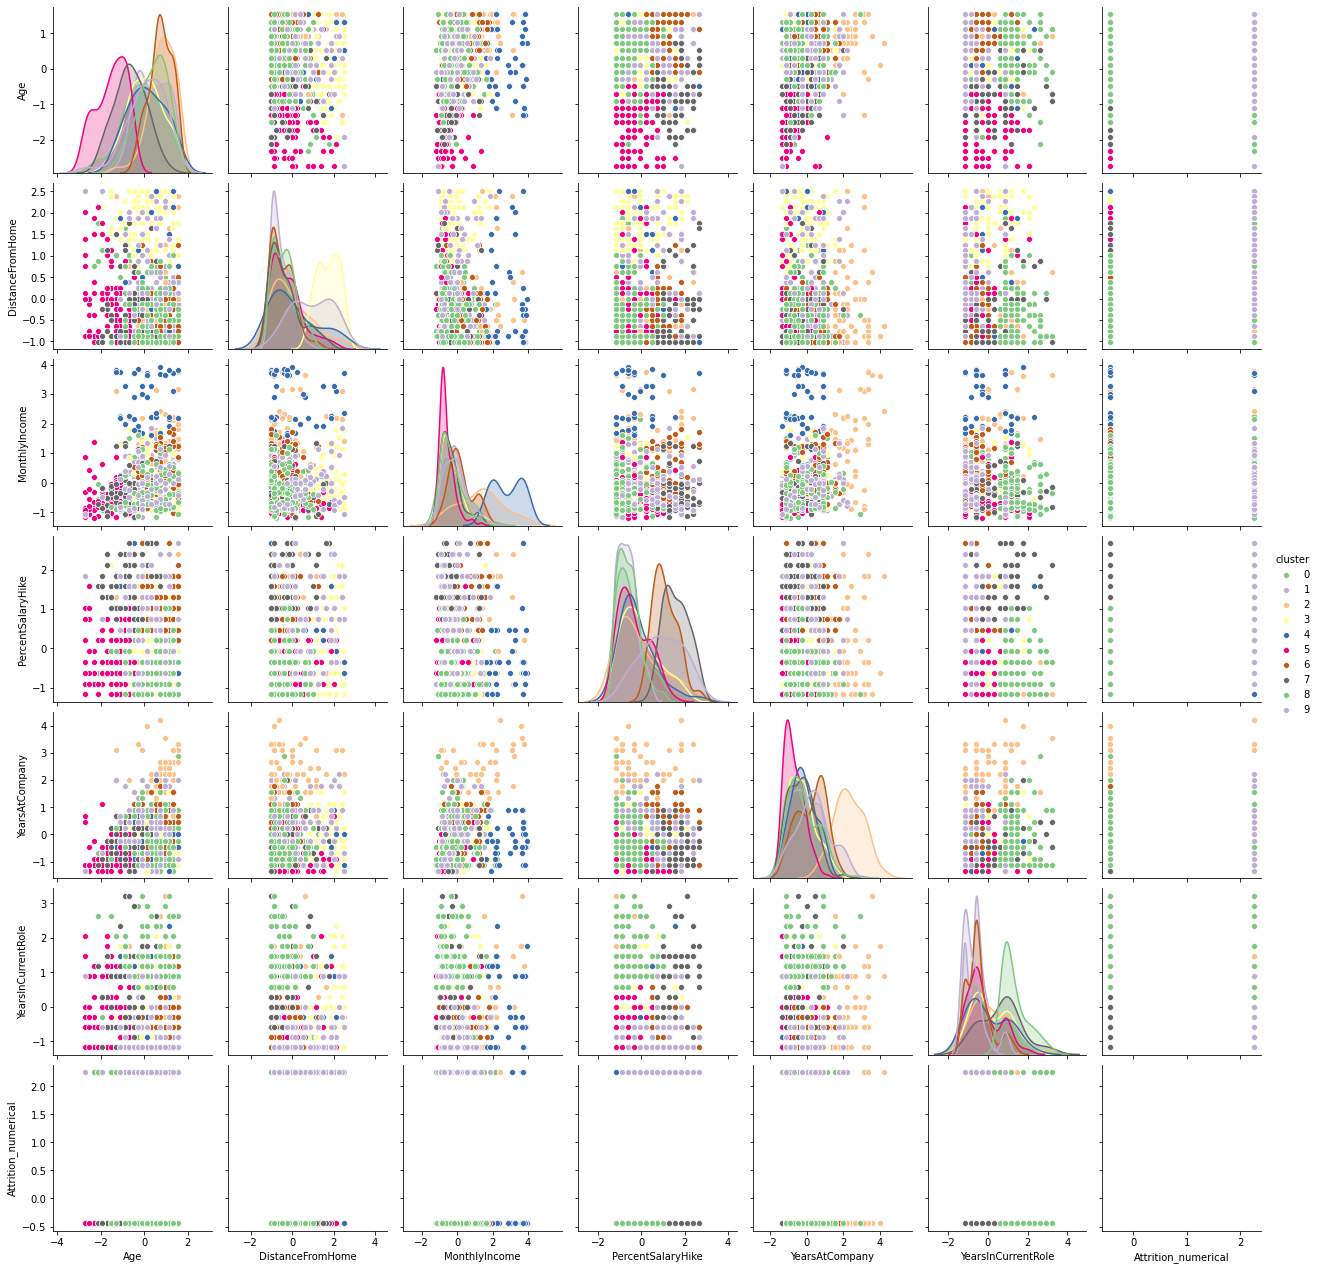

In [32]:
sb.pairplot(data= scaled_df, hue ="cluster", palette = "Accent")
plt.show()

(array([[ 30.,  95., 175., ...,   2.,   0.,   0.],
        [ 52.,  95., 232., ...,   1.,   0.,   0.],
        [ 46., 155., 208., ...,   1.,   0.,   0.],
        ...,
        [ 11.,  78., 227., ...,   0.,   0.,   0.],
        [ 12.,  98., 277., ...,   0.,   0.,   0.],
        [  2.,  42., 111., ...,   1.,   0.,   0.]]),
 array([ 0.        ,  3.02182524,  6.04365047,  9.06547571, 12.08730094,
        15.10912618, 18.13095142, 21.15277665, 24.17460189, 27.19642712,
        30.21825236]),
 <a list of 913 Lists of Patches objects>)

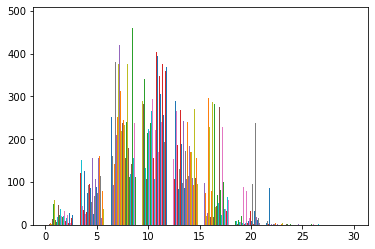

In [33]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
X= pairwise_distances(scaled_df, metric='manhattan')
X.shape
plt.hist(X)

In [34]:
import pyclustering

ModuleNotFoundError: No module named 'pyclustering'

In [ ]:
# Load list of points for cluster analysis.
sample = scaled_df
# Prepare initial centers using K-Means++ method.
initial_centers = kmeans_plusplus_initializer(sample, 2).initialize()
# Create instance of K-Means algorithm with prepared centers.
kmeans_instance = kmeans(sample, initial_centers)
# Run cluster analysis and obtain results.
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()
final_centers = kmeans_instance.get_centers()
# Visualize obtained results
kmeans_visualizer.show_clusters(sample, clusters, final_centers)

In [ ]:
# prepare input data and initial centers for cluster analysis using K-Means
# create metric that will be used for clustering
manhattan_metric = distance_metric(type_metric.MANHATTAN)
# create instance of K-Means using specific distance metric:
kmeans_instance = kmeans(sample, initial_centers, metric=manhattan_metric)
# run cluster analysis and obtain results
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN # To instantiate and fit the model
from sklearn.metrics import pairwise_distances # For Model evaluation
from sklearn.neighbors import NearestNeighbors # For Hyperparameter Tuning

In [ ]:
del scaled_df['cluster']

In [ ]:
dbscan_model = DBSCAN( eps = 0.8, min_samples =10, metric='euclidean')

In [ ]:
dbscan_model.fit(scaled_df)

In [ ]:
labels = dbscan_model.labels_
labels

In [ ]:
scaled_df["LABEL"] = labels
scaled_df.head(15)

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (13,8))

sb.scatterplot(x = "Age", y = "DistanceFromHome", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax1)
sb.scatterplot(x = "MonthlyIncome", y = "PercentSalaryHike", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax2)
sb.scatterplot(x = 'YearsAtCompany', y = "MonthlyIncome", data =scaled_df, hue = "LABEL", palette = "Accent", ax = ax3)
sb.scatterplot(x = "DistanceFromHome", y = "YearsInCurrentRole", data = scaled_df, hue = "LABEL", palette = "Accent", ax = ax4)

plt.tight_layout()
plt.show()

In [ ]:
sb.pairplot(data = scaled_df, hue = "LABEL", palette = "Accent")
plt.show()

In [ ]:
eps_to_test = [round(eps,1) for eps in np.arange(0.1, 2, 0.1)]
min_samples_to_test = range(5, 50, 5)

print("EPS:", eps_to_test)
print("MIN_SAMPLES:", list(min_samples_to_test))

In [ ]:
def get_metrics(eps, min_samples, dataset, iter_):
    
    # Fitting ======================================================================
    
    dbscan_model_ = DBSCAN( eps = eps, min_samples = min_samples)
    dbscan_model_.fit(dataset)
    
    # Mean Noise Point Distance metric =============================================
    noise_indices = dbscan_model_.labels_ == -1
    
    if True in noise_indices:
        neighboors = NearestNeighbors(n_neighbors = 6).fit(dataset)
        distances, indices = neighboors.kneighbors(dataset)
        noise_distances = distances[noise_indices, 1:]
        noise_mean_distance = round(noise_distances.mean(), 3)
    else:
        noise_mean_distance = None
        
    # Number of found Clusters metric ==============================================
    
    number_of_clusters = len(set(dbscan_model_.labels_[dbscan_model_.labels_ >= 0]))
    
    # Log ==========================================================================
    
    print("%3d | Tested with eps = %3s and min_samples = %3s | %5s %4s" % (iter_, eps, min_samples, str(noise_mean_distance), number_of_clusters))
        
    return(noise_mean_distance, number_of_clusters)

In [ ]:
# Dataframe per la metrica sulla distanza media dei noise points dai K punti più vicini
results_noise = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

# Dataframe per la metrica sul numero di cluster
results_clusters = pd.DataFrame( 
    data = np.zeros((len(eps_to_test),len(min_samples_to_test))), # Empty dataframe
    columns = min_samples_to_test, 
    index = eps_to_test
)

In [ ]:
iter_ = 0

print("ITER| INFO%s |  DIST    CLUS" % (" "*39))
print("-"*65)

for eps in eps_to_test:
    for min_samples in min_samples_to_test:
        
        iter_ += 1
        
        # Calcolo le metriche
        noise_metric, cluster_metric = get_metrics(eps, min_samples, scaled_df, iter_)
        
        # Inserisco i risultati nei relativi dataframe
        results_noise.loc[eps, min_samples] = noise_metric
        results_clusters.loc[eps, min_samples] = cluster_metric

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8) )

sb.heatmap(results_noise, annot = True, ax = ax1, cbar = False).set_title("METRIC: Mean Noise Points Distance")
sb.heatmap(results_clusters, annot = True, ax = ax2, cbar = False).set_title("METRIC: Number of clusters")

ax1.set_xlabel("N"); ax2.set_xlabel("N")
ax1.set_ylabel("EPSILON"); ax2.set_ylabel("EPSILON")

plt.tight_layout(); plt.show()

Viste le due Heatmap, ci concentriamo nell'intervallo  1.3 < eps < 1.5 e 5 < N < 10 , con un numero di cluster tra 2 e 3

Scegliamo eps = 1.4 e N =  5 

In [ ]:
# Istantiating with eps = 1 and min_samples = 15 (best model)
best_dbscan_model = DBSCAN( eps = 1.4, min_samples = 5)

# Fitting
best_dbscan_model.fit(scaled_df)

# Extracting labels
scaled_df["LABEL"] = best_dbscan_model.labels_

# Pairplot
sb.pairplot( scaled_df, hue = "LABEL" ); plt.show()

HIERARCHICAL CLUSTERING

In [35]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

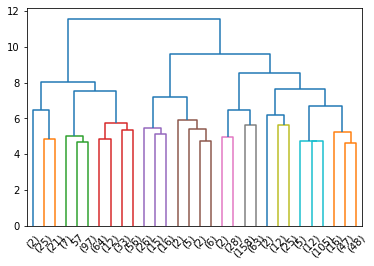

In [36]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold= 6, truncate_mode='lastp')

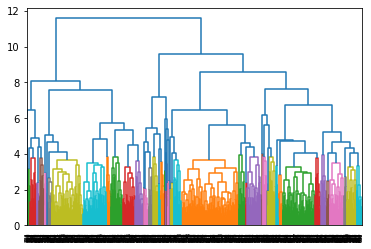

In [37]:
res = dendrogram(data_link, color_threshold=4.0)

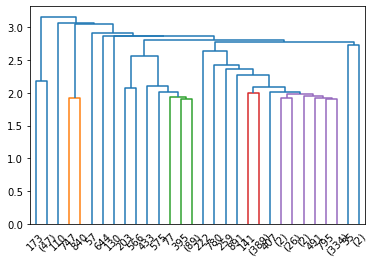

In [38]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=2.0, truncate_mode='lastp')

In [43]:
from sklearn.cluster import AgglomerativeClustering

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,

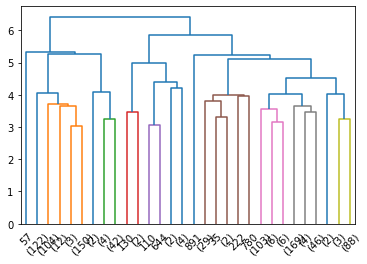

In [44]:
data_dist = pdist(scaled_df, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=4.0, truncate_mode='lastp')
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(scaled_df)